**Tp3 - BERNAT Loan**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

***Partie 1 : Classification***

In [58]:
def creationNuageDePoint(x, y, n, scale=1):
    """
    : param x : Coordonee en x du point de ref
    : param y : Coordonee en y du point de ref
    : param n : Nombre de point a generer
    : param scale : Distance max autorise
    : return : Une double liste des coordonnees x,y
    """
    multiplicateur = [-scale, scale]
    tableauCoordonee = [[x], [y]]
    for i in range(n):
        tirage = np.random.random(2)
        tableauCoordonee[0].append(tirage[0]* multiplicateur[np.random.randint(0, 2)]+x)
        tableauCoordonee[1].append(tirage[1]* multiplicateur[np.random.randint(0, 2)] +y)
    return np.array([tableauCoordonee[0],tableauCoordonee[1]])

In [59]:
def traceDeGroupe(g,param="ro"):
    '''
    :param g: groupe a afficher
    :param param: style d'affichage
    :return: void
    '''
    plt.plot(g[0],g[1],param)


In [60]:
def centre(g):
    '''
    :param g: groupe
    :return: le point centre
    '''
    return np.array([np.mean(g[0]), np.mean(g[1])])

In [61]:
def separateur(g1,g2):
    """renvoie le milieu du segment qui relie les centres de g1 et g2, et un vecteur directeur de la médiatrice"""
    c1 = centre(g1)
    c2 = centre(g2)
    m = 0.5*(c1+c2)
    c1x, c1y = c1
    c2x, c2y = c2
    return (m,(c1x-c2x,c1y-c2y))

def plot_separateur(m,w,scale=3):
    """à partir d'un point M et un vecteur directeur w, trace un segment de la droite correspondante
    (échelle/scale à ajuster selon la figure)
    """
    tw = (-w[1],w[0])
    plt.plot([m[0]+scale*tw[0],m[0]-scale*tw[0]],[m[1]+scale*tw[1],m[1]-scale*tw[1]],"y-")

In [66]:
def classifierPoint(p,m,w):
    '''
    :param p: point a classifier
    :param m: point median des barycentres des groupes
    :param w: vecteur du separateur
    :return: angle entre MP et w. Positif = g1, Negatif = g2
    '''
    mx, my = m
    px , py = p
    MP = (px-mx,py-my)
    return np.dot(MP,w)

In [67]:
def genererPointRandom(Xmin,Ymin,Xmax,Ymax):
    '''
    Generation d'un point 2D aleatoire compris dans les bornes passees en param
    '''
    x = Xmin + (np.random.random(1) * (Xmax-Xmin))
    y = Ymin + (np.random.random(1) * (Ymax-Ymin))
    return x[0], y[0]

In [68]:
def classifierListePoint(P,m,w):
    '''
    Permet de classifier une liste de point selon un separateur
    :param P: la liste de Point
    :param m: le point median du separateur
    :param w: le coefficient directeur du separateur
    :return: void
    '''
    for p in P:
        print(p)
        if classifierPoint(p,m,w) > 0:
            couleur = couleurG1[0]
        else :
            couleur = couleurG2[0]
        couleur = couleur + "X"
        plt.plot(p[0],p[1],couleur,markersize=15,alpha=0.5)

Après avoir définit toutes nos fonctions, nous allons pouvoir les tester. Dans un premier temps, une simple classification entre 2 groupes généré aléatoirement autour d'un point de base.

In [69]:
couleurG1 = "ro"
couleurG2 = "bo"

g2 = creationNuageDePoint(1,2,100,scale=0.5)
g1 = creationNuageDePoint(2,1,100,scale=0.5)
m, w = separateur(g1,g2)

(1.9660516318815269, 2.4915722697735156)
(0.6267156412251096, 1.6694115747071807)
(1.4912017575865655, 2.134181905418345)
(1.9421621566753584, 0.7030371709763512)
(0.8941246142924786, 1.715759022469711)
(2.087967356990296, 2.1563249018537984)
(1.2787835732163602, 2.1944416147072525)
(0.8527976643295556, 1.7396180186814507)
(2.1116563687126266, 1.0396142097173762)
(2.2166775384392357, 0.8106973070869765)
(0.581420382868064, 2.0616639747537313)
(1.2808061540224864, 0.8336934126662323)
(1.1466659479324202, 0.7575203107741333)
(1.7850870227655073, 1.6580527691155231)
(1.4858136788663734, 2.375835792784078)
(2.0085163944376463, 0.6726734200916855)
(1.5737667817167729, 1.41809625966676)
(1.3554028001745975, 1.5291181183385216)
(1.259632779574309, 0.9124293838681405)
(0.6127225690082159, 1.4525065875847774)
(0.9965351821925879, 2.297562012144896)
(0.8371008753092462, 0.8506866757489169)
(1.4066204260344124, 1.3520497021887736)
(2.2429572388268335, 2.1345228278907733)
(1.986083497691048, 0.971

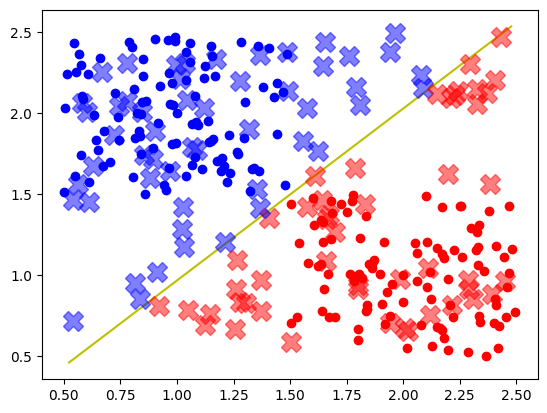

In [70]:
traceDeGroupe(g1,param=couleurG1)
traceDeGroupe(g2,param=couleurG2)
plot_separateur(m,w,scale=1)
points=[]
for i in range(100):
    points.append(genererPointRandom(0.5,0.5,2.5,2.5))
classifierListePoint(points,m,w)

Résultat : On constate aisément que notre séparateur fonctionne. On a bien une claire démarquation entre nos 2 groupes. Voyons ce qu'il en est pour des groupes un peu moins "séparés"

In [71]:
from sklearn.datasets import make_moons, make_circles
d = make_moons(noise=0.3, random_state=0)
xy, c = d

In [72]:
def traitementDoneeBonus(xy,c):
    g0c = [[],[]]
    g1c = [[],[]]
    for i in range(len(c)):
        if c[i] == 0:
            g0c[0].append(xy[i][0])
            g0c[1].append(xy[i][1])
        else :
            g1c[0].append(xy[i][0])
            g1c[1].append(xy[i][1])
    return np.array([g0c[0],g0c[1]]), np.array([g1c[0],g1c[1]])

In [73]:
g1 ,g2 = traitementDoneeBonus(xy,c)

(1.7517762468574798, -0.6991974168619207)
(-0.1197226968457552, 0.14121877514118797)
(1.3808441428632845, 0.13744654381860144)
(0.036988058449064276, 1.4646670774755113)
(-0.9461402437582918, 1.6867837914721644)
(0.9905763464178103, 0.6407544113375105)
(0.6583974404557797, -0.036462963271221005)
(-0.9537369242197099, 0.29580655010459855)
(1.9259199990117448, 0.7383928822525121)
(0.16314199158333587, -0.7200560143222411)
(0.8853610984595592, 0.052777143761990164)
(0.9743978536922375, 1.2530670366925385)
(0.4124256808967113, 0.8883936563517425)
(0.463925128815009, 1.212068238359163)
(-0.8673123975344826, 1.4813638789911665)
(-0.30827134968077985, 0.8657294546412431)
(0.9913415713317895, -0.10099646555414576)
(-0.6731360167489909, 0.4571494548053052)
(1.4275458681002267, 0.5196241064922975)
(0.3898892750503782, -0.9423758739567981)
(1.17829137910601, 0.9709026519099404)
(-0.25826534617461383, 0.7120903316873528)
(0.9893246986374469, 1.0210355531318531)
(0.5210020137280345, -0.240083313520

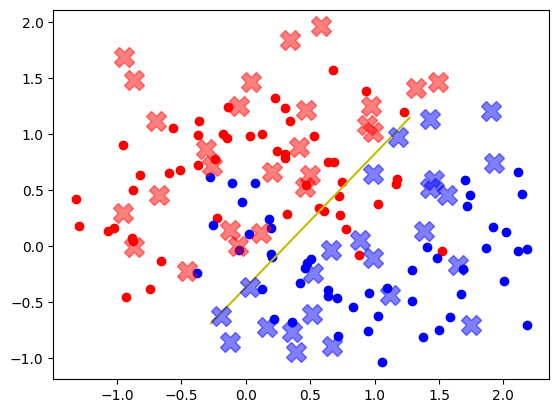

In [81]:
traceDeGroupe(g1,"ro")
traceDeGroupe(g2,"bo")
m,w = separateur(g1,g2)
plot_separateur(m,w,scale=1)
points=[]
for i in range(50):
    points.append(genererPointRandom(-1,-1,2,2))
classifierListePoint(points,m,w)

Resultat : On voit bien ici que faire du clustering en utilisant une affine comme separateur n'est pas adapte a ce style de donnee. Il nous faudrait un séparateur capable de mieux "épouser" la forme de nos groupes de données initiaux.

**PARTIE 2 : Iris**

In [82]:

d = np.genfromtxt('iris.txt', dtype=None,delimiter=',',names=True,encoding=None)

In [ ]:
def associerData(data,carac):
    '''
    Renvoie un dictionnaire de matrice numpy pour chaque classe
    :param data: une liste de couple de donnee
    :param carac: la carac que l'on veut etudier
    :return: un dictionnaire de matrice numpy pour chaque classe
    '''
    if carac == "sepal" :
        rang1=0
        rang2=1
    elif carac == "petal" :
        rang1=2
        rang2=3
    else:
        print("error : carac inconnue")
        return None
    dicoGroupe = {}
    for couple in data:
        (sl,sw,pl,pw,c) = couple
        if c not in dicoGroupe:
            dicoGroupe[c] = [[],[]]
        dicoGroupe[c][0].append(couple[rang1])
        dicoGroupe[c][1].append(couple[rang2])
    for groupe in dicoGroupe:
        dicoGroupe[groupe] = np.array([dicoGroupe[groupe][0],dicoGroupe[groupe][1]])
    return dicoGroupe

def afficherCarac(dico, color=None):
    '''
    Affiche les carac par groupe
    :param dico: dictionnaire des caracs par groupe
    :param color: liste de couleur pour l'affichage
    :return: void
    '''
    if color is None:
        color = ["ro", "bo", "go"]
    indice=0
    for groupe in dico:
        traceDeGroupe(dico[groupe],color[indice])
        print(groupe, " en couleur ", color[indice])
        if indice+1==len(color):
            indice = 0
        else:
            indice+=1

Comparons un peu nos caractéristiques via nos nouvelles fonctions.

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


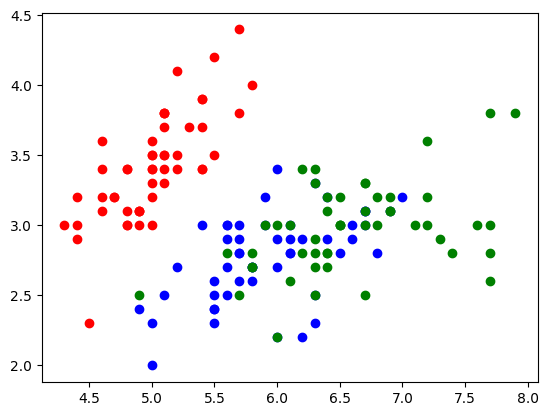

In [88]:
dicoData = associerData(d,"sepal")
afficherCarac(dicoData)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


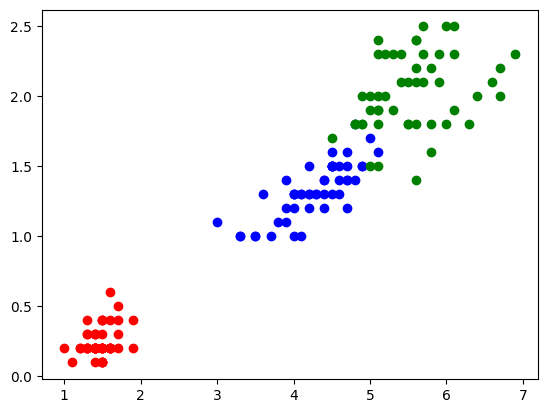

In [89]:
dicoData = associerData(d,"petal")
afficherCarac(dicoData)

Resultat : On voit bien que Petal est la meilleure caractéristique à étudier car les données sont mieux séparées. Pour Sepal, notre algorithme aurait du mal à discerner plus de 2 groupes proprement.

Essayons maintenant de classifier via la méthode de calcul de séparateur de la partie 1

In [131]:
dicoData = associerData(d,"petal")

In [132]:
g1 = dicoData['Iris-setosa']
g2 = dicoData['Iris-versicolor']
g3 = dicoData['Iris-virginica']

In [133]:
def classifierIris(P,m12,w12,m13,w13,m23,w23,couleur=["r","b","g"]):
    '''
    Fonction speciale our le traitement de l'iris. N'est pas utilisable en dehors de ce cas particulier a 3 groupes
    '''
    for p in P:
        if classifierPoint(p,m13,w13) > 0:
            if classifierPoint(p,m12, w12) > 0:
                color = couleur[0]
            else:
                color = couleur[1]
        else :
            if classifierPoint(p, m23,w23) < 0:
                color = couleur[2]
            else:
                color = couleur[1]
        color += "X"
        plt.plot(p[0],p[1],color,markersize=15,alpha=0.5)

def testClassificationSeparateur(g1,g2,g3,fctSeparateur=separateur,Xmin=0,Ymin=-3,Xmax=7,Ymax=5):
    m12,w12 = fctSeparateur(g1,g2)
    m13,w13 = fctSeparateur(g1,g3)
    m23,w23 = fctSeparateur(g2,g3)
    afficherCarac(dicoData)
    plot_separateur(m12,w12,scale=1)
    plot_separateur(m13,w13,scale=1)
    plot_separateur(m23,w23,scale=1)
    points=[]
    for i in range(100):
        points.append(genererPointRandom(Xmin,Ymin,Xmax,Ymax))
    classifierIris(points,m12,w12,m13,w13,m23,w23)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


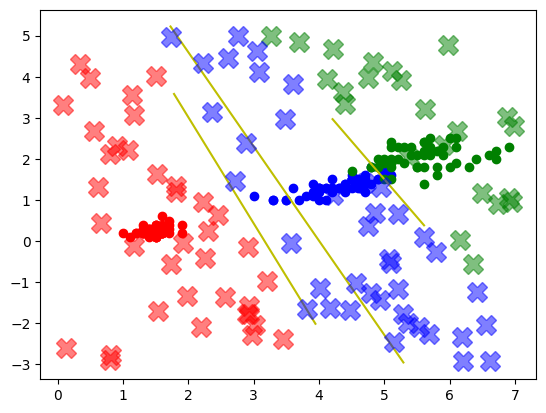

In [134]:
testClassificationSeparateur(g1,g2,g3,separateur)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


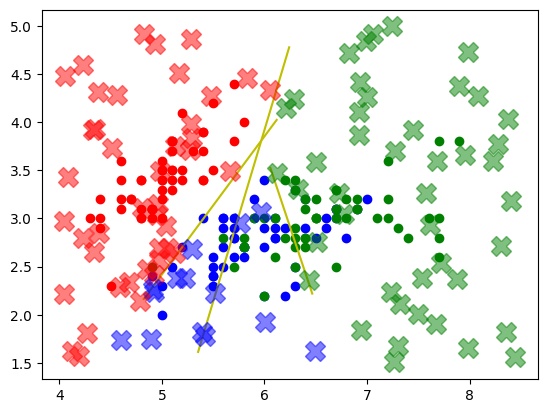

In [135]:
dicoData = associerData(d, "sepal")
g1 = dicoData['Iris-setosa']
g2 = dicoData['Iris-versicolor']
g3 = dicoData['Iris-virginica']
testClassificationSeparateur(g1,g2,g3,fctSeparateur=separateur,Xmin=4,Ymin=1.5,Xmax=8.5,Ymax=5)

Résultat PETAL : Nous avons un résultat satisfaisant. La distinction bleu verte est encore un peu difficile
Résultat SEPAL : Cela semble impossible de classifier ces données via un séparateur. Pour la suite des tests, nous nous contenterons de tester PETAL

In [136]:
dicoData = associerData(d, "petal")
g1 = dicoData['Iris-setosa']
g2 = dicoData['Iris-versicolor']
g3 = dicoData['Iris-virginica']

Nous allons maintenant essayer de tester avec nos propres modèles. J'ai essayé d'incliner plus ou moins les séparateur pour essayer d'épouser au mieux la délimitation des 2 dernières familles. TEST VIA PETAL

In [137]:
def baseSeparateur(g1,g2):
    c1 = centre(g1)
    c2 = centre(g2)
    m = 0.5*(c1+c2)
    c1x, c1y = c1
    c2x, c2y = c2
    return m, c1x,c1y,c2x,c2y

In [138]:
def separateurModele1(g1,g2):
    m, c1x,c1y,c2x,c2y = baseSeparateur(g1,g2)
    return (m,(c1x-c2x,c1y-2*c2y))

def separateurModele2(g1,g2):
    m, c1x,c1y,c2x,c2y = baseSeparateur(g1,g2)
    return (m,(c1x-c2x,2*c1y-c2y))

def separateurModele3(g1,g2):
    m, c1x,c1y,c2x,c2y = baseSeparateur(g1,g2)
    return (m,(c1x-2*c2x,c1y-c2y))

def separateurModele4(g1,g2):
    m, c1x,c1y,c2x,c2y = baseSeparateur(g1,g2)
    return (m,(2*c1x-c2x,2*c1y-c2y))

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


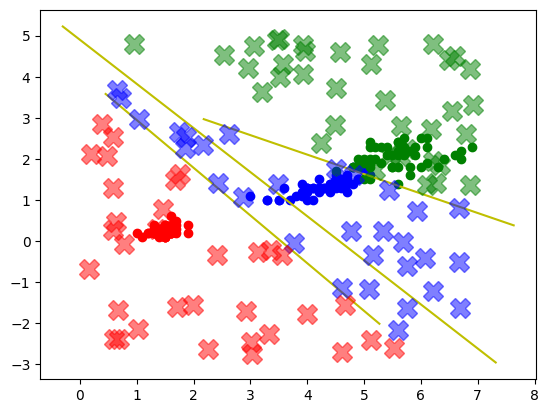

In [139]:
testClassificationSeparateur(g1,g2,g3,separateurModele1)

Resultat : Je le trouve légèrement plus efficace que le modèle 0 (initial). Même si la classification des points éloignés des groupes sont moins intérréssantes.

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


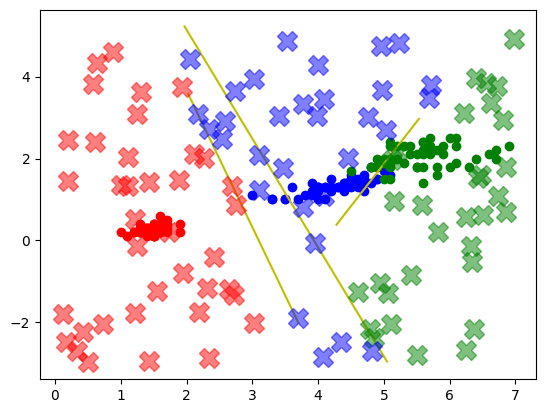

In [140]:
testClassificationSeparateur(g1,g2,g3,separateurModele2)

Résultat : Moins intérréssant que le modèle 1 et 0. L'inclinaison du séparateur ne convient pas avec cette donnée

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


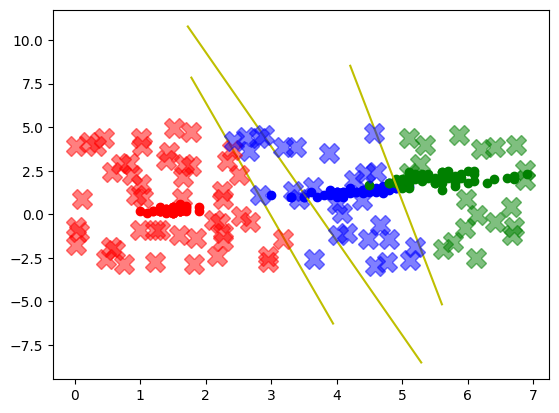

In [141]:
testClassificationSeparateur(g1,g2,g3,separateurModele3)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


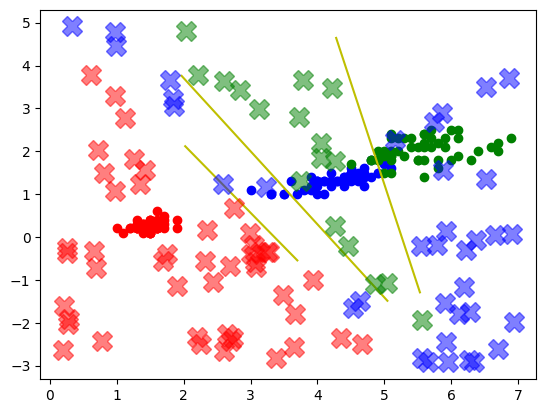

In [142]:
testClassificationSeparateur(g1,g2,g3,separateurModele4)

Résultat : Les modèles 3 et 4 ne conviennent pas.

Le meilleur modèle serait pour moi le n°1
